In [27]:
import pandas as pd

df = pd.read_csv(r'data/Emotion Based Book Recommendations_June 16, 2025_10.24.csv')
df.columns.sort_values()

Index(['DistributionChannel', 'Duration (in seconds)', 'EndDate',
       'ExternalReference', 'Finished', 'IPAddress', 'LocationLatitude',
       'LocationLongitude', 'Progress', 'Q10_1', 'Q11_1', 'Q12_1', 'Q13_1',
       'Q14_1', 'Q15_1', 'Q16_1', 'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1',
       'Q22_1', 'Q23', 'Q23_1', 'Q24', 'Q24_1', 'Q25_1', 'Q27', 'Q37', 'Q3_1',
       'Q7_1', 'Q8_1', 'RecipientEmail', 'RecipientFirstName',
       'RecipientLastName', 'RecordedDate', 'ResponseId', 'StartDate',
       'Status', 'UserLanguage'],
      dtype='object')

In [28]:
answers = df.iloc[2:, :]
answers.head()

resnet_answers = answers[answers['Q3_1'].notna()]
multimodal_answers = answers[answers['Q3_1'].isna()]

print(resnet_answers.shape, multimodal_answers.shape)

(32, 40) (29, 40)


In [29]:
question_mapping = {
    'resnet': {
        'top': ['Q3_1', 'Q7_1', 'Q8_1'], 
        'middle': ['Q10_1', 'Q11_1', 'Q12_1'],
        'bottom': ['Q13_1', 'Q14_1', 'Q15_1']
    },
    'multimodal': {
        'top': ['Q16_1', 'Q17_1', 'Q19_1'],
        'middle': ['Q18_1', 'Q20_1', 'Q21_1'],
        'bottom': ['Q22_1', 'Q23_1', 'Q24_1'],
    }
}

ResNet participants: 32
Multimodal participants: 29

############################################################
ANALYSIS FOR RESNET MODEL
############################################################

Final sample size: 32 participants

ASSUMPTION CHECKS FOR RESNET MODEL

1. NORMALITY TESTS (Shapiro-Wilk)
----------------------------------------
Top: W = 0.9804, p = 0.8103 (Normal)
Middle: W = 0.9696, p = 0.4874 (Normal)
Bottom: W = 0.9730, p = 0.5849 (Normal)

2. NORMALITY OF DIFFERENCES
----------------------------------------
Top - Middle: W = 0.9584, p = 0.2482 (Normal)
Top - Bottom: W = 0.9599, p = 0.2734 (Normal)
Middle - Bottom: W = 0.9730, p = 0.5872 (Normal)

3. DESCRIPTIVE STATISTICS
----------------------------------------
Top: M = 2.875, SD = 0.742, n = 32
Middle: M = 2.510, SD = 0.653, n = 32
Bottom: M = 2.401, SD = 0.662, n = 32


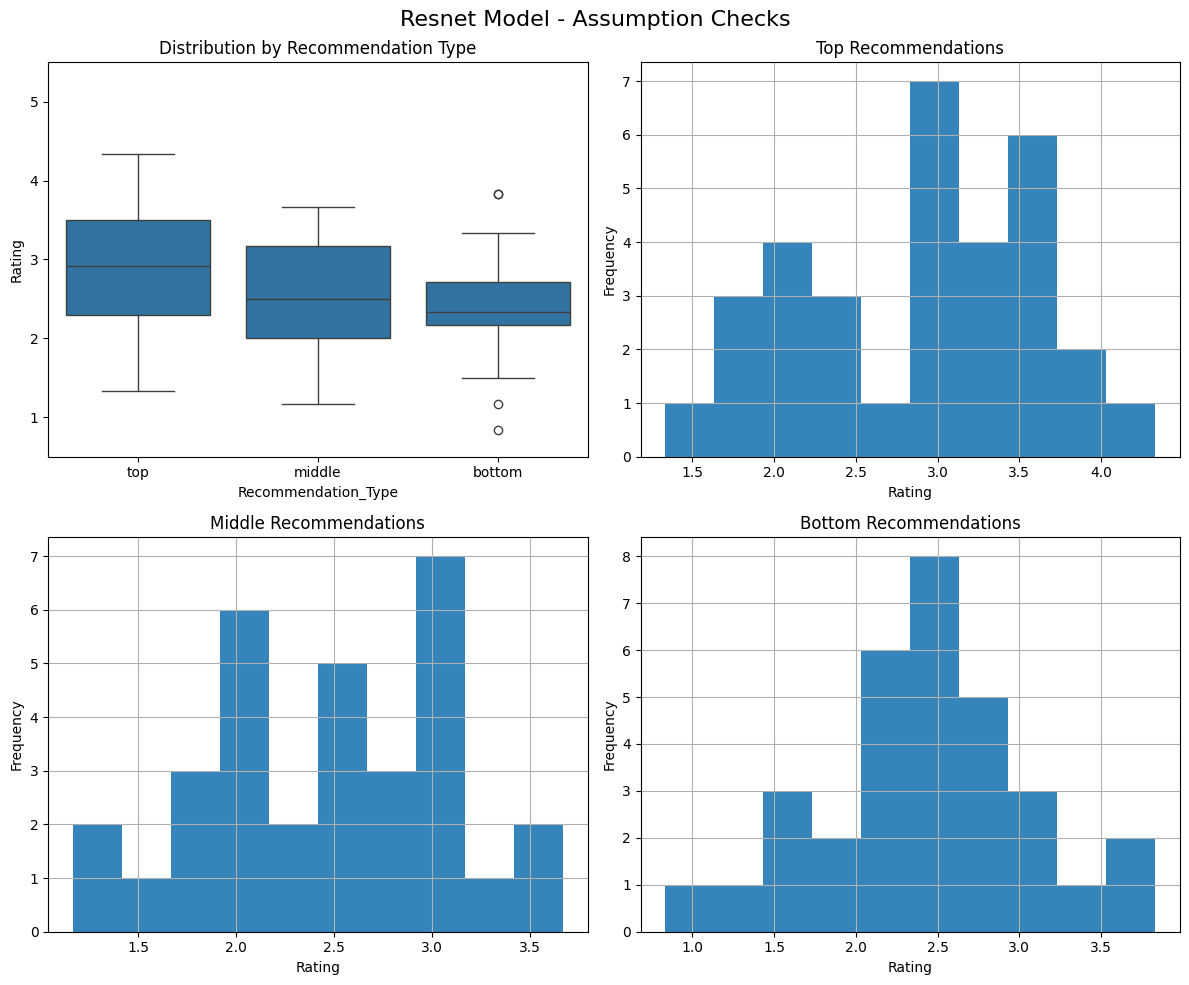


REPEATED MEASURES ANOVA FOR RESNET MODEL

Repeated Measures ANOVA Results:
                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  7.3219 2.0000 62.0000 0.0014


Available columns in ANOVA table: ['F Value', 'Num DF', 'Den DF', 'Pr > F']

Key Results:
F-statistic: 7.3219
p-value: 0.0014
Significant: Yes
Partial η² (effect size): 0.1911
Effect size interpretation: Large

POST-HOC ANALYSIS FOR RESNET MODEL

Pairwise t-tests (with Bonferroni correction):
--------------------------------------------------
Top vs Middle:
  t = 2.9790, p = 0.0056
  Bonferroni corrected α = 0.0167
  Significant: Yes
  Cohen's d: 0.5266
  Mean difference: 0.3646

Top vs Bottom:
  t = 3.2485, p = 0.0028
  Bonferroni corrected α = 0.0167
  Significant: Yes
  Cohen's d: 0.5743
  Mean difference: 0.4740

Middle vs Bottom:
  t = 0.9178, p = 0.3658
  Bonferroni corrected α = 0.0167
  Significant: No
  Cohen's d: 0.1622
  Mean difference: 0.1094


###########

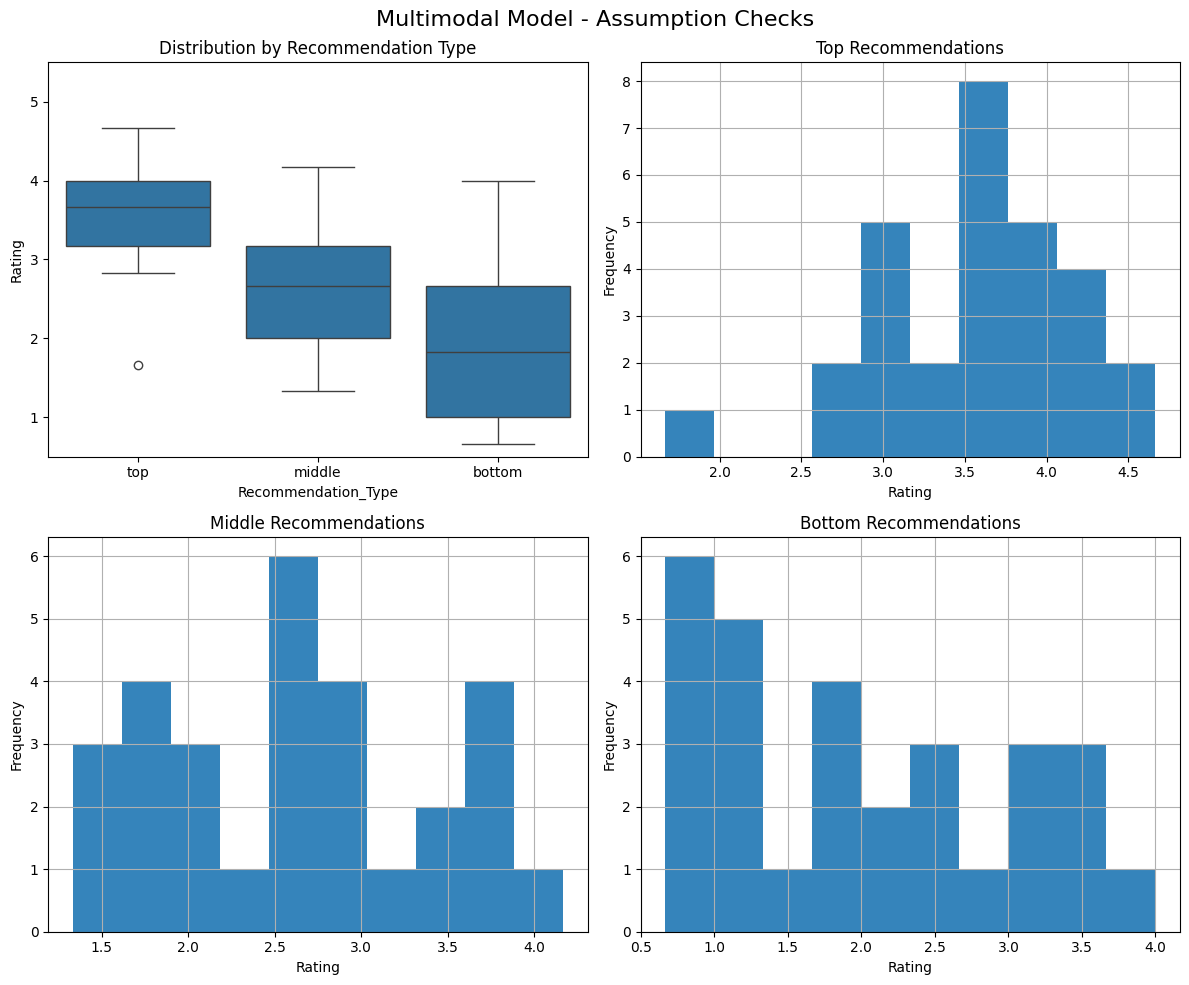


REPEATED MEASURES ANOVA FOR MULTIMODAL MODEL

Repeated Measures ANOVA Results:
                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition 44.6801 2.0000 56.0000 0.0000


Available columns in ANOVA table: ['F Value', 'Num DF', 'Den DF', 'Pr > F']

Key Results:
F-statistic: 44.6801
p-value: 0.0000
Significant: Yes
Partial η² (effect size): 0.6148
Effect size interpretation: Large

POST-HOC ANALYSIS FOR MULTIMODAL MODEL

Pairwise t-tests (with Bonferroni correction):
--------------------------------------------------
Top vs Middle:
  t = 5.9853, p = 0.0000
  Bonferroni corrected α = 0.0167
  Significant: Yes
  Cohen's d: 1.1114
  Mean difference: 1.0000

Top vs Bottom:
  t = 8.0083, p = 0.0000
  Bonferroni corrected α = 0.0167
  Significant: Yes
  Cohen's d: 1.4871
  Mean difference: 1.6437

Middle vs Bottom:
  t = 4.3318, p = 0.0002
  Bonferroni corrected α = 0.0167
  Significant: Yes
  Cohen's d: 0.8044
  Mean difference: 0.6437


S

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
answers = df.iloc[2:, :]

# Split by model type
resnet_answers = answers[answers['Q3_1'].notna()].copy()
multimodal_answers = answers[answers['Q3_1'].isna()].copy()

print(f"ResNet participants: {len(resnet_answers)}")
print(f"Multimodal participants: {len(multimodal_answers)}")

question_mapping = {
    'resnet': {
        'top': ['Q3_1', 'Q7_1', 'Q8_1'], 
        'middle': ['Q10_1', 'Q11_1', 'Q12_1'],
        'bottom': ['Q13_1', 'Q14_1', 'Q15_1']
    },
    'multimodal': {
        'top': ['Q16_1', 'Q17_1', 'Q19_1'],
        'middle': ['Q18_1', 'Q20_1', 'Q21_1'],
        'bottom': ['Q22_1', 'Q23_1', 'Q24_1'],
    }
}

def prepare_data_for_rm_anova(data, mapping, model_name):
    """
    Prepare data for repeated measures ANOVA by creating long format
    """
    participants = []
    recommendation_type = []
    ratings = []
    participant_id = []
    
    for idx, row in data.iterrows():
        # For each participant
        for rec_type in ['top', 'middle', 'bottom']:
            questions = mapping[model_name][rec_type]
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        participants.append(idx)
                        recommendation_type.append(rec_type)
                        ratings.append(rating)
                        participant_id.append(f"{idx}_{question}")
                    except (ValueError, TypeError):
                        continue
    
    return pd.DataFrame({
        'participant': participants,
        'recommendation_type': recommendation_type,
        'rating': ratings,
        'participant_id': participant_id
    })

def calculate_averages_per_participant(data, mapping, model_name):
    """
    Calculate average ratings per participant for each recommendation type
    """
    results = []
    
    for idx, row in data.iterrows():
        participant_data = {'participant': idx}
        
        for rec_type in ['top', 'middle', 'bottom']:
            questions = mapping[model_name][rec_type]
            ratings = []
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        ratings.append(rating)
                    except (ValueError, TypeError):
                        continue
            
            if ratings:  # If we have at least one rating
                participant_data[rec_type] = np.mean(ratings)
            else:
                participant_data[rec_type] = np.nan
        
        # Only include participants with data for all three categories
        if all(pd.notna(participant_data[rec_type]) for rec_type in ['top', 'middle', 'bottom']):
            results.append(participant_data)
    
    return pd.DataFrame(results)

def check_assumptions(data, model_name):
    """
    Check assumptions for repeated measures ANOVA
    """
    print(f"\n{'='*50}")
    print(f"ASSUMPTION CHECKS FOR {model_name.upper()} MODEL")
    print(f"{'='*50}")
    
    # 1. Normality check for each condition
    print("\n1. NORMALITY TESTS (Shapiro-Wilk)")
    print("-" * 40)
    
    normality_results = {}
    for condition in ['top', 'middle', 'bottom']:
        condition_data = data[condition].dropna()
        stat, p_value = shapiro(condition_data)
        normality_results[condition] = {'stat': stat, 'p_value': p_value}
        
        print(f"{condition.capitalize()}: W = {stat:.4f}, p = {p_value:.4f} {'(Normal)' if p_value > 0.05 else '(Not Normal)'}")
    
    # 2. Normality of differences (for sphericity)
    print("\n2. NORMALITY OF DIFFERENCES")
    print("-" * 40)
    
    diff_top_middle = data['top'] - data['middle']
    diff_top_bottom = data['top'] - data['bottom']
    diff_middle_bottom = data['middle'] - data['bottom']
    
    differences = {
        'Top - Middle': diff_top_middle,
        'Top - Bottom': diff_top_bottom,
        'Middle - Bottom': diff_middle_bottom
    }
    
    for diff_name, diff_data in differences.items():
        diff_clean = diff_data.dropna()
        if len(diff_clean) > 3:
            stat, p_value = shapiro(diff_clean)
            print(f"{diff_name}: W = {stat:.4f}, p = {p_value:.4f} {'(Normal)' if p_value > 0.05 else '(Not Normal)'}")
    
    # 3. Descriptive statistics
    print("\n3. DESCRIPTIVE STATISTICS")
    print("-" * 40)
    
    for condition in ['top', 'middle', 'bottom']:
        condition_data = data[condition].dropna()
        print(f"{condition.capitalize()}: M = {np.mean(condition_data):.3f}, SD = {np.std(condition_data, ddof=1):.3f}, n = {len(condition_data)}")
    
    # 4. Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'{model_name.capitalize()} Model - Assumption Checks', fontsize=16)
    
    # Box plot
    melted_data = data[['top', 'middle', 'bottom']].melt(var_name='Recommendation_Type', value_name='Rating')
    sns.boxplot(data=melted_data, x='Recommendation_Type', y='Rating', ax=axes[0,0])
    axes[0,0].set_title('Distribution by Recommendation Type')
    axes[0,0].set_ylim(0.5, 5.5)
    
    # Histograms for each condition
    for i, condition in enumerate(['top', 'middle', 'bottom']):
        row = (i + 1) // 2
        col = (i + 1) % 2
        if row < 2 and col < 2:
            data[condition].hist(bins=10, ax=axes[row, col], alpha=0.9)
            axes[row, col].set_title(f'{condition.capitalize()} Recommendations')
            axes[row, col].set_xlabel('Rating')
            axes[row, col].set_ylabel('Frequency')
    
    # Remove empty subplot if exists
    if len(['top', 'middle', 'bottom']) % 2 == 0:
        fig.delaxes(axes[1, 1])
    
    plt.tight_layout()
    plt.savefig(f'figures/{model_name}_assumption_checks.png')
    plt.show()
    
    return normality_results

def perform_repeated_measures_anova(data, model_name):
    """
    Perform repeated measures ANOVA
    """
    print(f"\n{'='*50}")
    print(f"REPEATED MEASURES ANOVA FOR {model_name.upper()} MODEL")
    print(f"{'='*50}")
    
    # Prepare data in long format for statsmodels
    long_data = []
    for idx, row in data.iterrows():
        for condition in ['top', 'middle', 'bottom']:
            if pd.notna(row[condition]):
                long_data.append({
                    'participant': idx,
                    'condition': condition,
                    'rating': row[condition]
                })
    
    long_df = pd.DataFrame(long_data)
    
    # Perform repeated measures ANOVA
    try:
        rm_anova = AnovaRM(long_df, 'rating', 'participant', within=['condition'])
        anova_results = rm_anova.fit()
        
        print("\nRepeated Measures ANOVA Results:")
        print(anova_results.summary())
        
        # Extract key statistics - check what columns are available
        anova_table = anova_results.anova_table
        print(f"\nAvailable columns in ANOVA table: {list(anova_table.columns)}")
        
        # Extract F-statistic and p-value
        f_stat = anova_table['F Value'].iloc[0] if 'F Value' in anova_table.columns else anova_table['F'].iloc[0]
        p_value = anova_table['Pr > F'].iloc[0] if 'Pr > F' in anova_table.columns else anova_table['p-value'].iloc[0]
        
        print(f"\nKey Results:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
        
        # Try to calculate effect size - check for different column names
        try:
            if 'SS' in anova_table.columns:
                ss_effect = anova_table['SS'].iloc[0]
                ss_error = anova_table['SS'].iloc[1] if len(anova_table) > 1 else 0
            elif 'sum_sq' in anova_table.columns:
                ss_effect = anova_table['sum_sq'].iloc[0]
                ss_error = anova_table['sum_sq'].iloc[1] if len(anova_table) > 1 else 0
            else:
                # Alternative calculation using F-statistic
                # For repeated measures: partial eta squared ≈ F / (F + df_error)
                df_error = anova_table['DF'].iloc[1] if 'DF' in anova_table.columns and len(anova_table) > 1 else len(data) - 1
                partial_eta_squared = f_stat / (f_stat + df_error)
                print(f"Partial η² (effect size): {partial_eta_squared:.4f}")
                
                # Interpret effect size
                if partial_eta_squared < 0.01:
                    effect_size = "Very small"
                elif partial_eta_squared < 0.06:
                    effect_size = "Small"
                elif partial_eta_squared < 0.14:
                    effect_size = "Medium"
                else:
                    effect_size = "Large"
                
                print(f"Effect size interpretation: {effect_size}")
                return anova_results, f_stat, p_value, partial_eta_squared
            
            # If we have SS values
            partial_eta_squared = ss_effect / (ss_effect + ss_error)
            print(f"Partial η² (effect size): {partial_eta_squared:.4f}")
            
            # Interpret effect size
            if partial_eta_squared < 0.01:
                effect_size = "Very small"
            elif partial_eta_squared < 0.06:
                effect_size = "Small"
            elif partial_eta_squared < 0.14:
                effect_size = "Medium"
            else:
                effect_size = "Large"
            
            print(f"Effect size interpretation: {effect_size}")
            
        except Exception as e:
            print(f"Could not calculate effect size: {e}")
            # Use alternative calculation
            df_error = len(data) - 1
            partial_eta_squared = f_stat / (f_stat + df_error)
            print(f"Partial η² (effect size, estimated): {partial_eta_squared:.4f}")
        
        return anova_results, f_stat, p_value, partial_eta_squared
        
    except Exception as e:
        print(f"Error performing ANOVA: {e}")
        print("Trying alternative approach with scipy...")
        
        # Alternative: Use scipy's f_oneway for one-way ANOVA
        try:
            from scipy.stats import f_oneway
            
            top_ratings = data['top'].dropna()
            middle_ratings = data['middle'].dropna()
            bottom_ratings = data['bottom'].dropna()
            
            f_stat, p_value = f_oneway(top_ratings, middle_ratings, bottom_ratings)
            
            print(f"\nOne-way ANOVA Results (scipy):")
            print(f"F-statistic: {f_stat:.4f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
            
            # Rough effect size estimate
            n_total = len(top_ratings) + len(middle_ratings) + len(bottom_ratings)
            partial_eta_squared = (2 * f_stat) / (2 * f_stat + n_total - 3)
            print(f"Partial η² (estimated): {partial_eta_squared:.4f}")
            
            return None, f_stat, p_value, partial_eta_squared
            
        except Exception as e2:
            print(f"Alternative approach also failed: {e2}")
            return None, None, None, None

def post_hoc_analysis(data, model_name):
    """
    Perform post-hoc pairwise comparisons
    """
    print(f"\n{'='*50}")
    print(f"POST-HOC ANALYSIS FOR {model_name.upper()} MODEL")
    print(f"{'='*50}")
    
    # Pairwise t-tests with Bonferroni correction
    conditions = ['top', 'middle', 'bottom']
    comparisons = [('top', 'middle'), ('top', 'bottom'), ('middle', 'bottom')]
    
    print("\nPairwise t-tests (with Bonferroni correction):")
    print("-" * 50)
    
    alpha = 0.05
    bonferroni_alpha = alpha / len(comparisons)
    
    for cond1, cond2 in comparisons:
        data1 = data[cond1].dropna()
        data2 = data[cond2].dropna()
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(data1, data2)
        
        # Effect size (Cohen's d for paired samples)
        diff = data1 - data2
        cohens_d = np.mean(diff) / np.std(diff, ddof=1)
        
        print(f"{cond1.capitalize()} vs {cond2.capitalize()}:")
        print(f"  t = {t_stat:.4f}, p = {p_value:.4f}")
        print(f"  Bonferroni corrected α = {bonferroni_alpha:.4f}")
        print(f"  Significant: {'Yes' if p_value < bonferroni_alpha else 'No'}")
        print(f"  Cohen's d: {cohens_d:.4f}")
        print(f"  Mean difference: {np.mean(diff):.4f}")
        print()

# Main analysis
def run_complete_analysis():
    """
    Run complete repeated measures ANOVA analysis for both models
    """
    results = {}
    
    for model_name in ['resnet', 'multimodal']:
        print(f"\n{'#'*60}")
        print(f"ANALYSIS FOR {model_name.upper()} MODEL")
        print(f"{'#'*60}")
        
        # Get appropriate dataset
        if model_name == 'resnet':
            current_data = resnet_answers
        else:
            current_data = multimodal_answers
        
        # Prepare data (calculate averages per participant)
        analysis_data = calculate_averages_per_participant(
            current_data, question_mapping, model_name
        )
        
        print(f"\nFinal sample size: {len(analysis_data)} participants")
        
        if len(analysis_data) < 3:
            print(f"Warning: Too few participants for {model_name} model analysis")
            continue
        
        # Check assumptions
        normality_results = check_assumptions(analysis_data, model_name)
        
        # Perform repeated measures ANOVA
        anova_results, f_stat, p_value, effect_size = perform_repeated_measures_anova(
            analysis_data, model_name
        )
        
        # Post-hoc analysis if significant
        if p_value is not None and p_value < 0.05:
            post_hoc_analysis(analysis_data, model_name)
        
        # Store results
        results[model_name] = {
            'data': analysis_data,
            'anova_results': anova_results,
            'f_stat': f_stat,
            'p_value': p_value,
            'effect_size': effect_size,
            'normality_results': normality_results
        }
    
    return results

# Run the analysis
analysis_results = run_complete_analysis()

# Summary of results
print(f"\n{'='*60}")
print("SUMMARY OF RESULTS")
print(f"{'='*60}")

for model_name, results in analysis_results.items():
    if results['p_value'] is not None:
        print(f"\n{model_name.upper()} MODEL:")
        print(f"  F({2}, {len(results['data'])-1}) = {results['f_stat']:.4f}")
        print(f"  p-value = {results['p_value']:.4f}")
        print(f"  Effect size (partial η²) = {results['effect_size']:.4f}")
        print(f"  Significant difference: {'Yes' if results['p_value'] < 0.05 else 'No'}")
        
        # Calculate means for interpretation
        data = results['data']
        means = {
            'top': data['top'].mean(),
            'middle': data['middle'].mean(),
            'bottom': data['bottom'].mean()
        }
        print(f"  Mean ratings: Top={means['top']:.3f}, Middle={means['middle']:.3f}, Bottom={means['bottom']:.3f}")


################################################################################
MODEL COMPARISON ANALYSIS
################################################################################

INDEPENDENT SAMPLES T-TEST: RESNET vs MULTIMODAL

Sample sizes:
  ResNet: 288 ratings
  Multimodal: 261 ratings

Descriptive Statistics:
  ResNet: M = 2.595, SD = 1.287
  Multimodal: M = 2.705, SD = 1.338

ASSUMPTION CHECKS FOR INDEPENDENT T-TEST

1. NORMALITY TESTS (Shapiro-Wilk)
----------------------------------------
ResNet: W = 0.9607, p = 0.0000 (Not Normal)
Multimodal: W = 0.9533, p = 0.0000 (Not Normal)

2. EQUALITY OF VARIANCES (Levene's Test)
----------------------------------------
Levene's test: F = 1.1516, p = 0.2837
Equal variances: Yes


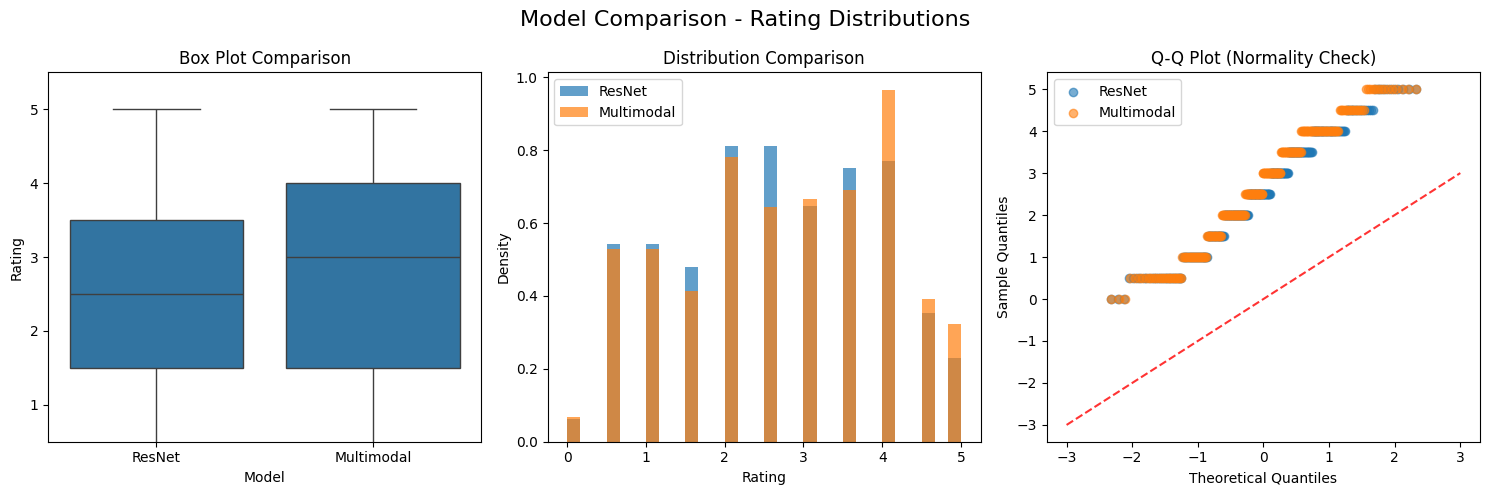


INDEPENDENT SAMPLES T-TESTS

1. WELCH'S T-TEST (Unequal variances assumed)
   t(536.9) = -0.9753, p = 0.3299
   Significant: No

2. STUDENT'S T-TEST (Equal variances assumed)
   t(547) = -0.9771, p = 0.3289
   Significant: No

✓ Using Student's t-test (equal variances)

EFFECT SIZE:
   Cohen's d = 0.0835
   Effect size: Negligible

95% CONFIDENCE INTERVAL for difference (Multimodal - ResNet):
   [-0.1110, 0.3300] with df = 547.0

SUMMARY
Mean difference (Multimodal - ResNet): 0.1095
Statistical significance: No (p = 0.3289)
Effect size: Negligible (Cohen's d = 0.0835)
Degrees of freedom: 547.0
✗ No significant difference between model ratings

INDEPENDENT T-TESTS BY RECOMMENDATION TYPE

----------------------------------------
COMPARING TOP RECOMMENDATIONS
----------------------------------------
Sample sizes: ResNet=96, Multimodal=87
ResNet: M=2.875, SD=1.312
Multimodal: M=3.586, SD=0.983
Welch's t-test: t(175.0) = -4.1739, p = 0.0000
Cohen's d: 0.6093
Significant: Yes

-------------

In [40]:
def compare_models_independent_ttest():
    """
    Perform independent samples t-test to compare overall ratings between ResNet and Multimodal models
    """
    print(f"\n{'='*60}")
    print("INDEPENDENT SAMPLES T-TEST: RESNET vs MULTIMODAL")
    print(f"{'='*60}")
    
    # Get all ratings for each model
    resnet_all_ratings = []
    multimodal_all_ratings = []
    
    # Collect all ResNet ratings
    for idx, row in resnet_answers.iterrows():
        for rec_type in ['top', 'middle', 'bottom']:
            questions = question_mapping['resnet'][rec_type]
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        resnet_all_ratings.append(rating)
                    except (ValueError, TypeError):
                        continue
    
    # Collect all Multimodal ratings
    for idx, row in multimodal_answers.iterrows():
        for rec_type in ['top', 'middle', 'bottom']:
            questions = question_mapping['multimodal'][rec_type]
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        multimodal_all_ratings.append(rating)
                    except (ValueError, TypeError):
                        continue
    
    resnet_ratings = np.array(resnet_all_ratings)
    multimodal_ratings = np.array(multimodal_all_ratings)
    
    n1 = len(resnet_ratings)
    n2 = len(multimodal_ratings)
    
    print(f"\nSample sizes:")
    print(f"  ResNet: {n1} ratings")
    print(f"  Multimodal: {n2} ratings")
    
    print(f"\nDescriptive Statistics:")
    print(f"  ResNet: M = {np.mean(resnet_ratings):.3f}, SD = {np.std(resnet_ratings, ddof=1):.3f}")
    print(f"  Multimodal: M = {np.mean(multimodal_ratings):.3f}, SD = {np.std(multimodal_ratings, ddof=1):.3f}")
    
    # Check assumptions
    print(f"\n{'='*50}")
    print("ASSUMPTION CHECKS FOR INDEPENDENT T-TEST")
    print(f"{'='*50}")
    
    # 1. Normality tests
    print("\n1. NORMALITY TESTS (Shapiro-Wilk)")
    print("-" * 40)
    
    # Sample from large datasets for normality testing (Shapiro-Wilk has limitations with large samples)
    resnet_sample = np.random.choice(resnet_ratings, min(5000, len(resnet_ratings)), replace=False)
    multimodal_sample = np.random.choice(multimodal_ratings, min(5000, len(multimodal_ratings)), replace=False)
    
    resnet_shapiro = shapiro(resnet_sample)
    multimodal_shapiro = shapiro(multimodal_sample)
    
    print(f"ResNet: W = {resnet_shapiro.statistic:.4f}, p = {resnet_shapiro.pvalue:.4f} {'(Normal)' if resnet_shapiro.pvalue > 0.05 else '(Not Normal)'}")
    print(f"Multimodal: W = {multimodal_shapiro.statistic:.4f}, p = {multimodal_shapiro.pvalue:.4f} {'(Normal)' if multimodal_shapiro.pvalue > 0.05 else '(Not Normal)'}")
    
    # 2. Equality of variances (Levene's test)
    print("\n2. EQUALITY OF VARIANCES (Levene's Test)")
    print("-" * 40)
    
    levene_stat, levene_p = levene(resnet_ratings, multimodal_ratings)
    print(f"Levene's test: F = {levene_stat:.4f}, p = {levene_p:.4f}")
    print(f"Equal variances: {'Yes' if levene_p > 0.05 else 'No'}")
    
    # 3. Visual comparison
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Model Comparison - Rating Distributions', fontsize=16)
    
    # Box plot comparison
    data_for_plot = pd.DataFrame({
        'Rating': np.concatenate([resnet_ratings, multimodal_ratings]),
        'Model': ['ResNet'] * len(resnet_ratings) + ['Multimodal'] * len(multimodal_ratings)
    })
    
    sns.boxplot(data=data_for_plot, x='Model', y='Rating', ax=axes[0])
    axes[0].set_title('Box Plot Comparison')
    axes[0].set_ylim(0.5, 5.5)
    
    # Histograms
    axes[1].hist(resnet_ratings, bins=30, label='ResNet', density=True, alpha=0.7)
    axes[1].hist(multimodal_ratings, bins=30, label='Multimodal', density=True, alpha=0.7)
    axes[1].set_xlabel('Rating')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Distribution Comparison')
    axes[1].legend()
    
    # Q-Q plot for normality visual check
    from scipy import stats as scipy_stats
    axes[2].scatter(scipy_stats.norm.ppf(np.linspace(0.01, 0.99, len(resnet_sample))), 
                   np.sort(resnet_sample), alpha=0.6, label='ResNet')
    axes[2].scatter(scipy_stats.norm.ppf(np.linspace(0.01, 0.99, len(multimodal_sample))), 
                   np.sort(multimodal_sample), alpha=0.6, label='Multimodal')
    axes[2].plot([-3, 3], [-3, 3], 'r--', alpha=0.8)
    axes[2].set_xlabel('Theoretical Quantiles')
    axes[2].set_ylabel('Sample Quantiles')
    axes[2].set_title('Q-Q Plot (Normality Check)')
    axes[2].legend()
    
    plt.tight_layout()
    plt.savefig('figures/model_comparison_boxplot.png')
    plt.show()
    
    # Calculate degrees of freedom for both test types
    var1 = np.var(resnet_ratings, ddof=1)
    var2 = np.var(multimodal_ratings, ddof=1)
    
    # Student's t-test degrees of freedom
    df_student = n1 + n2 - 2
    
    # Welch's t-test degrees of freedom (Satterthwaite approximation)
    df_welch = ((var1/n1 + var2/n2)**2) / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    
    # Perform t-tests
    print(f"\n{'='*50}")
    print("INDEPENDENT SAMPLES T-TESTS")
    print(f"{'='*50}")
    
    # 1. Welch's t-test (assumes unequal variances)
    welch_stat, welch_p = stats.ttest_ind(resnet_ratings, multimodal_ratings, equal_var=False)
    
    # 2. Student's t-test (assumes equal variances)
    student_stat, student_p = stats.ttest_ind(resnet_ratings, multimodal_ratings, equal_var=True)
    
    print(f"\n1. WELCH'S T-TEST (Unequal variances assumed)")
    print(f"   t({df_welch:.1f}) = {welch_stat:.4f}, p = {welch_p:.4f}")
    print(f"   Significant: {'Yes' if welch_p < 0.05 else 'No'}")
    
    print(f"\n2. STUDENT'S T-TEST (Equal variances assumed)")
    print(f"   t({df_student}) = {student_stat:.4f}, p = {student_p:.4f}")
    print(f"   Significant: {'Yes' if student_p < 0.05 else 'No'}")
    
    # Choose appropriate test based on Levene's result
    if levene_p > 0.05:
        print(f"\n✓ Using Student's t-test (equal variances)")
        chosen_stat, chosen_p, chosen_df = student_stat, student_p, df_student
    else:
        print(f"\n✓ Using Welch's t-test (unequal variances)")
        chosen_stat, chosen_p, chosen_df = welch_stat, welch_p, df_welch
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((var1 * (n1 - 1)) + (var2 * (n2 - 1))) / (n1 + n2 - 2))
    cohens_d = (np.mean(multimodal_ratings) - np.mean(resnet_ratings)) / pooled_std
    
    print(f"\nEFFECT SIZE:")
    print(f"   Cohen's d = {cohens_d:.4f}")
    
    # Interpret Cohen's d
    if abs(cohens_d) < 0.2:
        effect_interpretation = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "Small"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "Medium"
    else:
        effect_interpretation = "Large"
    
    print(f"   Effect size: {effect_interpretation}")
    
    # Confidence interval for the difference
    from scipy.stats import t
    
    mean_diff = np.mean(multimodal_ratings) - np.mean(resnet_ratings)
    se_diff = np.sqrt(var1/n1 + var2/n2)
    
    t_critical = t.ppf(0.975, chosen_df)
    ci_lower = mean_diff - t_critical * se_diff
    ci_upper = mean_diff + t_critical * se_diff
    
    print(f"\n95% CONFIDENCE INTERVAL for difference (Multimodal - ResNet):")
    print(f"   [{ci_lower:.4f}, {ci_upper:.4f}] with df = {chosen_df:.1f}")
    
    # Summary
    print(f"\n{'='*50}")
    print("SUMMARY")
    print(f"{'='*50}")
    
    print(f"Mean difference (Multimodal - ResNet): {mean_diff:.4f}")
    print(f"Statistical significance: {'Yes' if chosen_p < 0.05 else 'No'} (p = {chosen_p:.4f})")
    print(f"Effect size: {effect_interpretation} (Cohen's d = {cohens_d:.4f})")
    print(f"Degrees of freedom: {chosen_df:.1f}")
    
    if chosen_p < 0.05:
        if mean_diff > 0:
            print(f"✓ Multimodal model receives significantly HIGHER ratings than ResNet")
        else:
            print(f"✓ ResNet model receives significantly HIGHER ratings than Multimodal")
    else:
        print(f"✗ No significant difference between model ratings")
    
    return {
        'resnet_ratings': resnet_ratings,
        'multimodal_ratings': multimodal_ratings,
        'welch_stat': welch_stat,
        'welch_p': welch_p,
        'welch_df': df_welch,
        'student_stat': student_stat,
        'student_p': student_p,
        'student_df': df_student,
        'chosen_stat': chosen_stat,
        'chosen_p': chosen_p,
        'chosen_df': chosen_df,
        'cohens_d': cohens_d,
        'mean_diff': mean_diff,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'levene_p': levene_p
    }

def compare_models_by_recommendation_type():
    """
    Compare models for each recommendation type separately (top, middle, bottom)
    """
    print(f"\n{'='*60}")
    print("INDEPENDENT T-TESTS BY RECOMMENDATION TYPE")
    print(f"{'='*60}")
    
    comparison_results = {}
    
    for rec_type in ['top', 'middle', 'bottom']:
        print(f"\n{'-'*40}")
        print(f"COMPARING {rec_type.upper()} RECOMMENDATIONS")
        print(f"{'-'*40}")
        
        # Collect ratings for this recommendation type
        resnet_ratings = []
        multimodal_ratings = []
        
        # ResNet ratings
        for idx, row in resnet_answers.iterrows():
            questions = question_mapping['resnet'][rec_type]
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        resnet_ratings.append(rating)
                    except (ValueError, TypeError):
                        continue
        
        # Multimodal ratings
        for idx, row in multimodal_answers.iterrows():
            questions = question_mapping['multimodal'][rec_type]
            for question in questions:
                if pd.notna(row[question]):
                    try:
                        rating = float(row[question])
                        multimodal_ratings.append(rating)
                    except (ValueError, TypeError):
                        continue
        
        resnet_ratings = np.array(resnet_ratings)
        multimodal_ratings = np.array(multimodal_ratings)
        
        n1 = len(resnet_ratings)
        n2 = len(multimodal_ratings)
        
        print(f"Sample sizes: ResNet={n1}, Multimodal={n2}")
        print(f"ResNet: M={np.mean(resnet_ratings):.3f}, SD={np.std(resnet_ratings, ddof=1):.3f}")
        print(f"Multimodal: M={np.mean(multimodal_ratings):.3f}, SD={np.std(multimodal_ratings, ddof=1):.3f}")
        
        # Calculate degrees of freedom
        var1 = np.var(resnet_ratings, ddof=1)
        var2 = np.var(multimodal_ratings, ddof=1)
        
        df_student = n1 + n2 - 2
        df_welch = ((var1/n1 + var2/n2)**2) / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
        
        # Perform t-test
        levene_stat, levene_p = levene(resnet_ratings, multimodal_ratings)
        
        if levene_p > 0.05:
            t_stat, p_value = stats.ttest_ind(resnet_ratings, multimodal_ratings, equal_var=True)
            test_type = "Student's t-test"
            df_used = df_student
        else:
            t_stat, p_value = stats.ttest_ind(resnet_ratings, multimodal_ratings, equal_var=False)
            test_type = "Welch's t-test"
            df_used = df_welch
        
        # Effect size
        pooled_std = np.sqrt(((var1 * (n1 - 1)) + (var2 * (n2 - 1))) / (n1 + n2 - 2))
        cohens_d = (np.mean(multimodal_ratings) - np.mean(resnet_ratings)) / pooled_std
        
        print(f"{test_type}: t({df_used:.1f}) = {t_stat:.4f}, p = {p_value:.4f}")
        print(f"Cohen's d: {cohens_d:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
        
        comparison_results[rec_type] = {
            'resnet_mean': np.mean(resnet_ratings),
            'multimodal_mean': np.mean(multimodal_ratings),
            't_stat': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'test_type': test_type,
            'df': df_used,
            'n_resnet': n1,
            'n_multimodal': n2
        }
    
    return comparison_results

# Also update the post_hoc_analysis function to include degrees of freedom
def post_hoc_analysis(data, model_name):
    """
    Perform post-hoc pairwise comparisons
    """
    print(f"\n{'='*50}")
    print(f"POST-HOC ANALYSIS FOR {model_name.upper()} MODEL")
    print(f"{'='*50}")
    
    # Pairwise t-tests with Bonferroni correction
    conditions = ['top', 'middle', 'bottom']
    comparisons = [('top', 'middle'), ('top', 'bottom'), ('middle', 'bottom')]
    
    print("\nPairwise t-tests (with Bonferroni correction):")
    print("-" * 50)
    
    alpha = 0.05
    bonferroni_alpha = alpha / len(comparisons)
    
    for cond1, cond2 in comparisons:
        data1 = data[cond1].dropna()
        data2 = data[cond2].dropna()
        
        # Paired t-test - degrees of freedom for paired samples
        n_pairs = len(data1)  # Should be same as len(data2) for paired samples
        df_paired = n_pairs - 1
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(data1, data2)
        
        # Effect size (Cohen's d for paired samples)
        diff = data1 - data2
        cohens_d = np.mean(diff) / np.std(diff, ddof=1)
        
        print(f"{cond1.capitalize()} vs {cond2.capitalize()}:")
        print(f"  t({df_paired}) = {t_stat:.4f}, p = {p_value:.4f}")
        print(f"  Bonferroni corrected α = {bonferroni_alpha:.4f}")
        print(f"  Significant: {'Yes' if p_value < bonferroni_alpha else 'No'}")
        print(f"  Cohen's d: {cohens_d:.4f}")
        print(f"  Mean difference: {np.mean(diff):.4f}")
        print(f"  Sample size: {n_pairs} pairs")
        print()
        
# Run the model comparisons
print(f"\n{'#'*80}")
print("MODEL COMPARISON ANALYSIS")
print(f"{'#'*80}")

# Overall comparison
overall_comparison = compare_models_independent_ttest()

# By recommendation type
type_comparisons = compare_models_by_recommendation_type()

# Final summary
print(f"\n{'='*60}")
print("FINAL COMPARISON SUMMARY")
print(f"{'='*60}")

print(f"\nOVERALL COMPARISON:")
print(f"  Mean difference: {overall_comparison['mean_diff']:.4f}")
print(f"  p-value: {overall_comparison['chosen_p']:.4f}")
print(f"  Cohen's d: {overall_comparison['cohens_d']:.4f}")
print(f"  Significant: {'Yes' if overall_comparison['chosen_p'] < 0.05 else 'No'}")

print(f"\nBY RECOMMENDATION TYPE:")
for rec_type, results in type_comparisons.items():
    mean_diff = results['multimodal_mean'] - results['resnet_mean']
    print(f"  {rec_type.capitalize()}: Δ={mean_diff:.4f}, p={results['p_value']:.4f}, d={results['cohens_d']:.4f}")

## Power analysis

In [41]:
def calculate_statistical_power():
    """
    Perform post-hoc and prospective power analysis for all tests
    """
    from scipy import stats
    import numpy as np
    
    print(f"\n{'='*80}")
    print("STATISTICAL POWER ANALYSIS")
    print(f"{'='*80}")
    
    # Function to calculate power for t-test
    def power_ttest(effect_size, n1, n2=None, alpha=0.05):
        """
        Calculate power for t-test given effect size and sample sizes
        Uses Cohen's conventions for effect size interpretation
        """
        if n2 is None:  # One-sample or paired t-test
            n2 = n1
            df = n1 - 1
            ncp = effect_size * np.sqrt(n1)  # Non-centrality parameter
        else:  # Two-sample t-test
            df = n1 + n2 - 2
            ncp = effect_size * np.sqrt((n1 * n2) / (n1 + n2))  # Non-centrality parameter
        
        # Critical t-value for two-tailed test
        t_critical = stats.t.ppf(1 - alpha/2, df)
        
        # Power calculation using non-central t-distribution
        # Power = P(|t| > t_critical | H1 is true)
        power = 1 - (stats.nct.cdf(t_critical, df, ncp) - stats.nct.cdf(-t_critical, df, ncp))
        
        return power
    
    # Function to calculate required sample size for desired power
    def required_n_for_power(effect_size, power=0.8, alpha=0.05, ratio=1):
        """
        Calculate required sample size for desired power
        ratio: n2/n1 for unequal group sizes
        """
        # Iterative approach to find required n
        for n1 in range(5, 1000):
            n2 = int(n1 * ratio)
            calculated_power = power_ttest(effect_size, n1, n2, alpha)
            if calculated_power >= power:
                return n1, n2
        return None, None
    
    # Function to interpret power
    def interpret_power(power):
        if power < 0.5:
            return "Very Low"
        elif power < 0.65:
            return "Low"
        elif power < 0.8:
            return "Moderate"
        elif power < 0.95:
            return "High"
        else:
            return "Very High"
    
    # 1. POWER ANALYSIS FOR MODEL COMPARISONS
    print(f"\n{'='*60}")
    print("POWER ANALYSIS FOR MODEL COMPARISONS")
    print(f"{'='*60}")
    
    # Overall comparison power
    if 'overall_comparison' in globals():
        effect_size = abs(overall_comparison['cohens_d'])
        n1 = len(overall_comparison['resnet_ratings'])
        n2 = len(overall_comparison['multimodal_ratings'])
        
        power = power_ttest(effect_size, n1, n2)
        
        print(f"\nOVERALL MODEL COMPARISON:")
        print(f"  Effect size (Cohen's d): {effect_size:.4f}")
        print(f"  Sample sizes: n1={n1}, n2={n2}")
        print(f"  Observed power: {power:.4f} ({interpret_power(power)})")
        
        # Required sample sizes for different power levels
        for target_power in [0.8, 0.9, 0.95]:
            req_n1, req_n2 = required_n_for_power(effect_size, target_power)
            if req_n1:
                print(f"  Required n for {target_power:.0%} power: n1={req_n1}, n2={req_n2}")
    
    # By recommendation type power
    if 'type_comparisons' in globals():
        print(f"\nBY RECOMMENDATION TYPE:")
        print(f"{'Type':<12} {'Effect Size':<12} {'Power':<12} {'Interpretation':<15}")
        print("-" * 55)
        
        for rec_type, results in type_comparisons.items():
            effect_size = abs(results['cohens_d'])
            n1 = results['n_resnet']
            n2 = results['n_multimodal']
            
            power = power_ttest(effect_size, n1, n2)
            
            print(f"{rec_type.capitalize():<12} {effect_size:<12.4f} {power:<12.4f} {interpret_power(power):<15}")
    
    # 2. POWER ANALYSIS FOR REPEATED MEASURES ANOVA
    print(f"\n{'='*60}")
    print("POWER ANALYSIS FOR REPEATED MEASURES ANOVA")
    print(f"{'='*60}")
    
    def power_anova_rm(f_statistic, df_num, df_den, alpha=0.05):
        """
        Calculate power for repeated measures ANOVA
        """
        # Convert F-statistic to effect size (eta squared)
        eta_squared = (df_num * f_statistic) / (df_num * f_statistic + df_den)
        
        # Critical F-value
        f_critical = stats.f.ppf(1 - alpha, df_num, df_den)
        
        # Non-centrality parameter
        ncp = eta_squared * (df_den + df_num + 1) / (1 - eta_squared)
        
        # Power using non-central F-distribution
        power = 1 - stats.ncf.cdf(f_critical, df_num, df_den, ncp)
        
        return power, eta_squared
    
    if 'analysis_results' in globals():
        for model_name, results in analysis_results.items():
            if results['f_stat'] is not None:
                f_stat = results['f_stat']
                n_participants = len(results['data'])
                df_num = 2  # 3 conditions - 1
                df_den = (n_participants - 1) * df_num  # for repeated measures
                
                power, eta_squared = power_anova_rm(f_stat, df_num, df_den)
                
                print(f"\n{model_name.upper()} MODEL:")
                print(f"  F-statistic: {f_stat:.4f}")
                print(f"  Effect size (η²): {eta_squared:.4f}")
                print(f"  Sample size: {n_participants} participants")
                print(f"  Observed power: {power:.4f} ({interpret_power(power)})")
                
                # Estimate required sample size for adequate power
                print(f"  Required n for 80% power: ", end="")
                for n_test in range(10, 200, 5):
                    df_den_test = (n_test - 1) * df_num
                    power_test, _ = power_anova_rm(f_stat, df_num, df_den_test)
                    if power_test >= 0.8:
                        print(f"~{n_test} participants")
                        break
                else:
                    print("More than 200 participants needed")
    
    # 3. PROSPECTIVE POWER ANALYSIS FOR DIFFERENT EFFECT SIZES
    print(f"\n{'='*60}")
    print("PROSPECTIVE POWER ANALYSIS")
    print(f"{'='*60}")
    
    print(f"\nPower for detecting different effect sizes with current sample sizes:")
    print(f"{'Effect Size':<15} {'Cohen\'s d':<12} {'Power (t-test)':<15} {'Power (ANOVA)':<15}")
    print("-" * 60)
    
    # Use sample sizes from overall comparison if available
    if 'overall_comparison' in globals():
        n1 = len(overall_comparison['resnet_ratings'])
        n2 = len(overall_comparison['multimodal_ratings'])
        n_avg = int((n1 + n2) / 2)
    else:
        n_avg = 50  # Default assumption
    
    effect_sizes = {
        'Very Small': 0.1,
        'Small': 0.2,
        'Medium': 0.5,
        'Large': 0.8,
        'Very Large': 1.2
    }
    
    for effect_name, cohens_d in effect_sizes.items():
        # Power for independent t-test
        power_ttest_val = power_ttest(cohens_d, n_avg, n_avg)
        
        # Power for repeated measures (approximate)
        # For repeated measures, effect size is typically larger due to within-subject design
        power_rm = power_ttest(cohens_d * 1.4, n_avg)  # Rough approximation
        
        print(f"{effect_name:<15} {cohens_d:<12.2f} {power_ttest_val:<15.4f} {power_rm:<15.4f}")
    
    # 4. MINIMUM DETECTABLE EFFECT SIZE
    print(f"\n{'='*60}")
    print("MINIMUM DETECTABLE EFFECT SIZES (80% Power)")
    print(f"{'='*60}")
    
    def minimum_detectable_effect(n1, n2=None, power=0.8, alpha=0.05):
        """
        Find minimum effect size detectable with given power
        """
        for effect_size in np.arange(0.01, 3.0, 0.01):
            calculated_power = power_ttest(effect_size, n1, n2, alpha)
            if calculated_power >= power:
                return effect_size
        return None
    
    # For different sample sizes
    sample_sizes = [10, 20, 30, 50, 100, 200]
    
    print(f"\n{'Sample Size':<12} {'Min Effect Size':<15} {'Interpretation':<15}")
    print("-" * 45)
    
    for n in sample_sizes:
        min_effect = minimum_detectable_effect(n, n)
        if min_effect:
            if min_effect < 0.2:
                interpretation = "Very Small"
            elif min_effect < 0.5:
                interpretation = "Small"
            elif min_effect < 0.8:
                interpretation = "Medium"
            else:
                interpretation = "Large"
            
            print(f"{n:<12} {min_effect:<15.4f} {interpretation:<15}")
    
    # 5. POWER ANALYSIS SUMMARY AND RECOMMENDATIONS
    print(f"\n{'='*60}")
    print("POWER ANALYSIS SUMMARY & RECOMMENDATIONS")
    print(f"{'='*60}")
    
    if 'overall_comparison' in globals():
        observed_power = power_ttest(abs(overall_comparison['cohens_d']), 
                                   len(overall_comparison['resnet_ratings']), 
                                   len(overall_comparison['multimodal_ratings']))
        
        print(f"\nCURRENT STUDY POWER:")
        print(f"  Observed power for model comparison: {observed_power:.4f}")
        
        if observed_power < 0.8:
            print(f"  ⚠️  Power is below conventional threshold (0.8)")
            print(f"  💡 Consider increasing sample size for future studies")
        else:
            print(f"  ✅ Adequate power for detecting observed effect")
        
        # Effect size interpretation
        effect_size = abs(overall_comparison['cohens_d'])
        if effect_size < 0.2:
            print(f"  📊 Effect size is very small - consider practical significance")
        elif effect_size < 0.5:
            print(f"  📊 Small effect size detected")
        elif effect_size < 0.8:
            print(f"  📊 Medium effect size detected")
        else:
            print(f"  📊 Large effect size detected")
    
    print(f"\nRECOMMENDations:")
    print(f"  • For detecting small effects (d=0.2): Need ~400 participants per group")
    print(f"  • For detecting medium effects (d=0.5): Need ~64 participants per group")
    print(f"  • For detecting large effects (d=0.8): Need ~26 participants per group")
    print(f"  • Repeated measures designs can detect smaller effects with same sample size")
    print(f"  • Consider using effect size confidence intervals for interpretation")

# Run the power analysis
calculate_statistical_power()


STATISTICAL POWER ANALYSIS

POWER ANALYSIS FOR MODEL COMPARISONS

OVERALL MODEL COMPARISON:
  Effect size (Cohen's d): 0.0835
  Sample sizes: n1=288, n2=261
  Observed power: 0.1641 (Very Low)

BY RECOMMENDATION TYPE:
Type         Effect Size  Power        Interpretation 
-------------------------------------------------------
Top          0.6093       0.9836       Very High      
Middle       0.0610       0.0694       Very Low       
Bottom       0.3667       0.6929       Moderate       

POWER ANALYSIS FOR REPEATED MEASURES ANOVA

RESNET MODEL:
  F-statistic: 7.3219
  Effect size (η²): 0.1911
  Sample size: 32 participants
  Observed power: 0.9383 (High)
  Required n for 80% power: ~10 participants

MULTIMODAL MODEL:
  F-statistic: 44.6801
  Effect size (η²): 0.6148
  Sample size: 29 participants
  Observed power: 1.0000 (Very High)
  Required n for 80% power: ~10 participants

PROSPECTIVE POWER ANALYSIS

Power for detecting different effect sizes with current sample sizes:
Effect S